# <font color = 'orange'><b>Regularized Linear Models</b></font>

In [2]:
# Regularized linear models are a simple way to prevent overfitting by adding a penalty term to the cost function.
# The two most common types of regularization are Ridge Regression and Lasso Regression.

## <font color = 'orange'><b>Ridge Regression</b></font>

In [3]:
# Ridge Regression
# Ridge Regression is a regularized version of Linear Regression: a regularization term equal to 
# α * Σi=1 to n θi^2 is added to the cost function.

# cost function :
# J(θ) = MSE(θ) + α * 1/2 * Σi=1 to n θi^2

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [7]:
ridge_reg = Ridge(alpha = 1, solver= 'cholesky', random_state=42)
ridge_reg.fit(X, y)

Ridge(alpha=1, random_state=42, solver='cholesky')

In [8]:
ridge_reg.predict([[1.5]])

array([[1.55071465]])

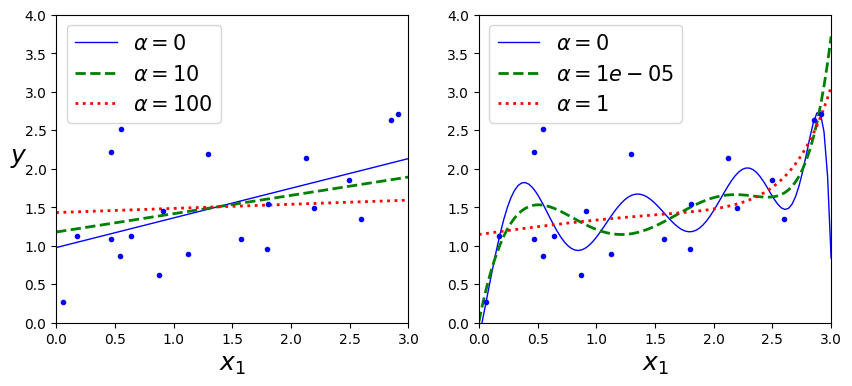

In [21]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
                ('std_scaler', StandardScaler()),
                ('regul_reg', model)
            ])
            
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r'$\alpha = {}$'.format(alpha))
    
    plt.plot(X, y, 'b.', linewidth = 3)
    plt.legend(loc = 'upper left', fontsize = 15)
    plt.xlabel('$x_1$', fontsize = 18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize = (10, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True,alphas = (0, 10**-5, 1), random_state = 42)

## <font color = 'orange'><b>Lasso Regression</b></font>

In [22]:
# Lasso regression (Least Absolute Shrinkage and Selection Operator Regression)
# Lasso Regression is another regularized version of Linear Regression: a regularization term is added to the cost function.

# cost function :
# J(θ) = MSE(θ) + α * Σi=1 to n |θi|

In [23]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

c:\Users\khans\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


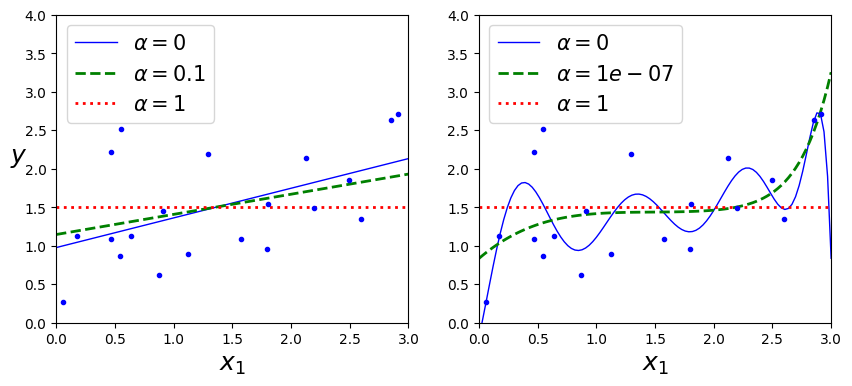

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)